In [1]:
%matplotlib inline
import velocyto as vcy
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import pickle
import seaborn as sns
import scipy.stats as stats

/data/apps/anaconda/3.6-5.0.1/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
plt.style.use("ggplot")

In [6]:
#ind = pickle.load(open("merged2.pickle", "rb"))
brca_spliced = pickle.load(open("brca_spliced.pickle", 'rb'))
normal_spliced = pickle.load(open("normal_spliced.pickle", 'rb'))

In [23]:
len(brca_spliced["Luminal_2"])

3001

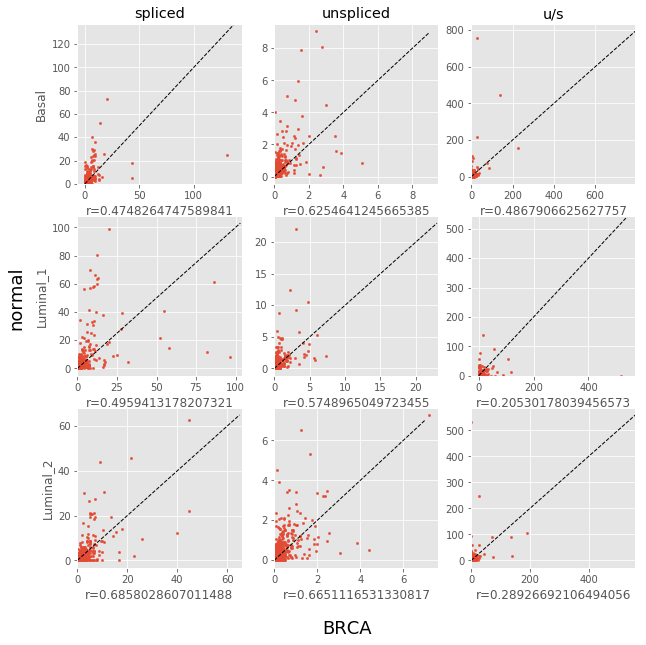

In [22]:
fig, axarr = plt.subplots(3,3, figsize=(10,10))

for i, cell in enumerate(brca_spliced.keys()):
    for j in range(3):
        if j == 0:
            brca = [val["spliced"] for key, val in brca_spliced[cell].items()]
            normal = [val["spliced"] for key, val in normal_spliced[cell].items()]
        elif j == 1:
            brca = [val["unspliced"] for key, val in brca_spliced[cell].items()]
            normal = [val["unspliced"] for key, val in normal_spliced[cell].items()]
        elif j == 2:
            brca = [val["unspliced"]/val["spliced"] if val["spliced"] > 0 else 0 for key, val in brca_spliced[cell].items()]
            normal = [val["unspliced"]/val["spliced"] if val["spliced"] > 0 else 0 for key, val in normal_spliced[cell].items()]
        
        axarr[i][j].scatter(brca, normal, s=5)
        
        #set x and y lim equal to one another
        if axarr[i][j].get_ylim()[1] > axarr[i][j].get_xlim()[1]:
            axarr[i][j].set_xlim(0,axarr[i][j].get_ylim()[1])
        else:
            axarr[i][j].set_ylim(0, axarr[i][j].get_xlim()[1])
            
        axarr[i][j].plot(np.arange(0,axarr[i][j].get_xlim()[1]), np.arange(0,axarr[i][j].get_ylim()[1]), '--', color='black', linewidth=1)
        r = stats.pearsonr(brca, normal)[0]
        axarr[i][j].set_xlabel("r={}".format(r))
        #axarr[i][j].annotate("r={}".format(r), xy=(0.95,0.05))
#         axarr[i][j].boxplot([brca, normal], showfliers=False, labels=["BRCA", "Normal"])
#         anova = stats.f_oneway(brca, normal)
#         if anova[1] <= 0.05:
#             if anova[1] <= 0.001:
#                 stars="* * *"
#             elif anova[1] <= 0.01:
#                 stars="* *"
#             else:
#                 stars="*"
#             x1, x2 = 1,2
#             ylim = axarr[i][j].get_ylim()
#             y,h,col = ylim[1] - (abs(ylim[0]) + abs(ylim[0]))/15 ,(abs(ylim[0]) + abs(ylim[0]))/100 , 'k'
#             axarr[i][j].plot([x1,x1,x2,x2], [y, y+h,y+h,y], lw=1.5, c=col)
#             axarr[i][j].text((x1+x2)*.5, y+h, stars, ha='center', va='bottom', color=col)


for ax, cell in zip(axarr[:,0], brca_spliced.keys()):
    ax.set_ylabel(cell)

for ax, group in zip(axarr[0], ["spliced", "unspliced", "u/s"]):
    ax.set_title(group)

font = {'weight': 'normal', 'size': 18}
fig.text(0.5,0.04, 'BRCA', ha='center', va='center', fontdict=font)
fig.text(0.04,0.5, 'normal', ha='center', va='center', rotation='vertical', fontdict=font)

    
plt.savefig("/pub/smorabit/velo/figures/brca_vs_normal_scatter.pdf")

In [16]:
np.mean(test)

1295.8167277574141

In [28]:
stats.pearsonr(test, test2)

(0.4959413178207321, 4.191126502041981e-186)

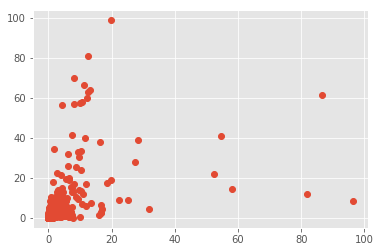

In [29]:
plt.plot(test, test2, 'o')

In [60]:
axarr[i][j].get_ylim()

(-0.03929374718848403, 0.8251686909581646)